In [ ]:
# Basic text analytics. Personal Competence classification based on tfidf
# Sila 9 January 2023
#

In [ ]:
# Use files:
# JobTrendAds_TFIDF_Search.csv, JobTrendAds_TFIDF_ChangedJobTexts.csv
# on Github.
# Change code below, accordingly. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving JobTrendAdsTFIDF_ChangedJobTexts.csv to JobTrendAdsTFIDF_ChangedJobTexts.csv


In [ ]:
!ls

JobTrendAdsTFIDF_ChangedJobTexts.csv  JobTrendAdsTFIDF.csv  sample_data


In [ ]:
# Read Jobfile
import pandas as pd

colnames=['Source.Name','ID', 'Date time', 'Details', 'Region', 'Pers.Komp', 'Pers.Komp.Value','Rest'] 
df = pd.read_csv("JobTrendAdsTFIDF.csv", usecols = colnames, encoding="utf-8", sep=';', header = 0 )

# The JobTrend file must saved in utf-8 format

In [ ]:
df.rename(columns = {'Rest':'JobAdText'}, inplace = True)
df.rename(columns = {'Pers.Komp':'PersonligeKompetencer'}, inplace = True)

In [ ]:
df.drop('Source.Name' , axis = 1 , inplace = True )
df.drop('Date time' , axis = 1 , inplace = True )
df.drop('Details' , axis = 1 , inplace = True )
df.drop('Region' , axis = 1 , inplace = True )

In [ ]:
# Replace No-value with zero on Pers.Komp column
df["PersonligeKompetencer"] = df["PersonligeKompetencer"].fillna(0)

In [ ]:
from nltk import tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# For start, only look at 1 row
AllSentences = []
for row in df.head(2).itertuples():
    AdText = row.JobAdText

    Sentences = tokenize.sent_tokenize(AdText)
    
    for sent in Sentences:
       AllSentences.append(sent)

In [ ]:
print(AllSentences)

['                                                                                                                                                                                                                                                                              Digital Marketing Koordinator  A/S Vestfrost  Esbjerg  Indrykket\xa029.\xa0oktober\xa02021    Vil du være med til at opbygge et marketingsunivers for en mellemstor B2B-virksomhed?', 'I en nyoprettet stilling får du i høj grad mulighed for at sætte dit præg på, hvordan Vestfrost opfattes af kunder og partnere gennem udarbejdelsen af virksomhedens marketingmateriale.', 'Så brænder du for online marketing?', 'Kan du skabe digitale kampagner med målbar effekt og konverteringer?', 'Har du flair for at arbejde med content og sociale medier?', 'Så har vi jobbet til dig!', 'Du skal være med til at løfte vores digitale salgs- og marketingaktiviteter for vores forskellige brands, samt tiltrække nye kunder.', 'Dine primære opgave

In [ ]:
# Using Gensim to make Predictions.
#
# Text similiarity scores

In [ ]:
from gensim import corpora, models, similarities
import jieba

In [ ]:
# jieba is a text segmentation Python module for cutting the words 
# into segmentations for easier analysis of text similarity in the future.)

In [ ]:
texts = [jieba.lcut(text) for text in AllSentences]
dictionary = corpora.Dictionary(texts)
feature_cnt = len(dictionary.token2id)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
tfidf = models.TfidfModel(corpus) 

In [ ]:
personal_qualifications=['Har gode kommunikationsevner',
'Kan arbejde selvmotiverende',
'Du tager ansvar for dine projekter og følger altid dine opgaver til dørs',
'Vi forventer, at du som person er selvledende, kreativ, fleksibel og indstillet på at arbejde i et travlt miljø.',
'Du er nysgerrig, kritisk og løsningsorienteret - også når det bliver komplekst',
'Du har drive, og passion for kvalitet',
'Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende',
'er engageret, har god energi og er en god kollega',
'Som person er du først og fremmest kreativ og du er god til at finde på nye løsninger',
'Du er ansvarsfuld, selvstændig og har mod på at udvikle dig'
'Være initiativrig og opsøgende',
'Ivrig efter af lære Som person forestiller vi os, at du er engageret, kreativ og nysgerrig',
'Du er god til at skabe relationer på tværs',
'er selvstændig og grundig',
'Du har flair for content',
'Du er frisk, nede på jorden og klar på en god snak med dine kollegaer',
'Du trives med rutineprægede opgaver, og bidrager med masser af godt humør',
'Er optimist og ser muligheder fremfor begrænsninger',
'Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen.Vi forestiller os, at du som person er kreativ, visuel og har god sans for detaljen',
'Som menneske er du udadvendt, opsøgende og pædagogisk',
'Er kvalitetsbevidst og sætter en stolthed i at udføre et godt stykke arbejde',
'Er detaljeorienteret og har en struktureret tilgang til dine arbejdsopgaver',
'Er god til at tale med mennesker og sætte sig ind i deres behov',
'Du er detaljeorienteret til mindste detalje og stortrives med en bred kontaktflade',
'Du er struktureret og har høj selvdisciplin',
'Du udviser en høj grad af uafhængighed, er proaktiv og selvstartende',
'Vi søger en person, der er detaljeorienteret og analytisk stærk',
'Du trives med at være opsøgende Du kan arbejde både selvstændigt og som del af et mindre team',
'er ansvarlig, struktureret og målorienteret samt serviceminded, positiv og imødekommende',
'Kreativ, nysgerrig, initiativrig og ikke bange for at spørge. Struktureret og detaljeorienteret',
'At du har et godt drive, kan arbejde selvstændigt, struktureret og tage ansvar',
'Du er god til at styre din tid og trives med at have mange bolde i luften']

In [ ]:
def FindMostSimilarSentence(AdTextCorpus, LookupSentence):
   texts = [jieba.lcut(text) for text in AdTextCorpus]
   dictionary = corpora.Dictionary(texts)
   feature_cnt = len(dictionary.token2id) 

   corpus = [dictionary.doc2bow(text) for text in texts]
     
   tfidf = models.TfidfModel(corpus) 

   kw_vector = dictionary.doc2bow(jieba.lcut(LookupSentence))

   index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features = feature_cnt)

   sim = index[tfidf[kw_vector]]
  
   highvalue=0
   kompetence_response=""
   sentence_response=""
   for i in range(len(sim)):
       if (sim[i]>highvalue):
          highvalue = sim[i]
          kompetence_response = "Kompetence Lookup:" + LookupSentence
          sentence_response = AdTextCorpus[i] + " - " + str(sim[i])

   return highvalue, kompetence_response, sentence_response     

In [ ]:
# Test of FindMostSimilarSentence
AdTextCorpus = ['I love reading Japanese novels. My favorite Japanese writer is Tanizaki Junichiro.',
                'Natsume Soseki is a well-known Japanese novelist and his Kokoro is a masterpiece.',
                'American modern poetry is good. ']
   
LookupSentence = 'Japan has some great novelists. Who is your favorite Japanese writer?'

In [ ]:
highvalue, kompetence_response, sentence_response = FindMostSimilarSentence(AdTextCorpus, LookupSentence)
if (highvalue>0):
   print(kompetence_response)
   print(sentence_response)

Kompetence Lookup:Japan has some great novelists. Who is your favorite Japanese writer?
I love reading Japanese novels. My favorite Japanese writer is Tanizaki Junichiro. - 0.5032489


In [ ]:
def FindPersonalQualificationsVerbose(AdTextCorpus):
   best_match=0
   best_kompetence_response=""
   best_sentence_response = ""
   for i in range(len(personal_qualifications)):
      Lookup_Sentence=personal_qualifications[i]
      highvalue, kompetence_response, sentence_response = FindMostSimilarSentence(AdTextCorpus, Lookup_Sentence)
      if (highvalue>best_match):
         best_match=highvalue
         best_kompetence_response = kompetence_response
         best_sentence_response = sentence_response
   return best_match, best_kompetence_response, best_sentence_response 

In [ ]:
# For each row search find best match
y_real=[]
y_predicted=[]
for row in df.head(20).itertuples():
    AdText = row.JobAdText

    Sentences = tokenize.sent_tokenize(AdText)
    print("----")
    print("Matches For ad: ",row.ID)
    this_ad_highvalue, this_ad_kompetence_response, this_ad_sentence_response = FindPersonalQualificationsVerbose(Sentences)
    y_real.append(row.PersonligeKompetencer)
    if (this_ad_highvalue>0.5):
        y_predicted.append(1)
        if (row.PersonligeKompetencer==0):
          print("WRONG")
    else:
        y_predicted.append(0)
        if (row.PersonligeKompetencer==1):
          print("WRONG")

    if (this_ad_highvalue>0):
       print("Value: ", row.PersonligeKompetencer)
       print(this_ad_kompetence_response)
       print(this_ad_sentence_response)

----
Matches For ad:  1805634
WRONG
Value:  1
Kompetence Lookup:Du har flair for content
Har du flair for at arbejde med content og sociale medier? - 0.4540776
----
Matches For ad:  756524
Value:  0
Kompetence Lookup:Har gode kommunikationsevner
                                                          Stilling: Støtteperson / Mentor   Oprettet: 30-08-2019     Job start: Snarest muligt   Annoncenr: 93705 JobId: 106655          Arbejdssted: 5000 Odense C   Køn:   MK                          Jobbeskrivelse Støtteperson/mentor søges til 37-årig kvindelig studerende. - 0.4402535
----
Matches For ad:  321357
Value:  0
Kompetence Lookup:Har gode kommunikationsevner
Du skal brænde for at lave gode og simple løsninger for vores kunder. - 0.37749028
----
Matches For ad:  1720508
Value:  1
Kompetence Lookup:Du tager ansvar for dine projekter og følger altid dine opgaver til dørs
Du tager ansvar for dine projekter og følger altid dine opgaver til dørs. - 0.9998848
----
Matches For ad:  519566
Val

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Result for JobTrendAdsTFIDF - The original, unchanged jobad texts.
# For threshold = 0.5 for the Similiarity search.

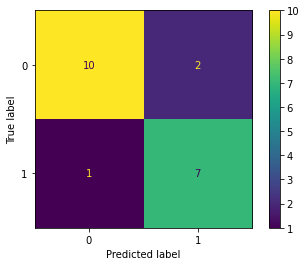

In [ ]:
cm = confusion_matrix(y_real, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Now if we change the job adtext in 4 ad texts,
# The results also change.

# Changes:
'''Har du flair for at arbejde med content og sociale medier
changed to:
Du er god til at forstå indholdets betydning på sociale medier?

Du tager ansvar for dine projekter og følger altid dine opgaver til dørs
changed to:
Du udviser stor ansvarlighed i projektarbejdet og gør altid arbejdet færdigt

Du er ansvarsfuld, selvstændig og har mod på at udvikle dig
changed to:
Du er pligtopfylden, kan arbejde alene og ønsker at gro som person.

Du trives med rutineprægede opgaver, og bidrager med masser af godt humør
changed to:
Du synes om at arbejdet består af gentagelser og rutiner, og du er altid i godt humør
'''

'Du er god til at forstå indholdets betydning på sociale medier?\nchanged to:\nHar du flair for at arbejde med content og sociale medier\n\nDu tager ansvar for dine projekter og følger altid dine opgaver til dørs\nchanged to:\nDu udviser stor ansvarlighed i projektarbejdet og gør altid arbejdet færdigt\n\nDu er ansvarsfuld, selvstændig og har mod på at udvikle dig\nchanged to:\nDu er pligtopfylden, kan arbejde alene og ønsker at gro som person.\n\nDu synes om at arbejdet består af gentagelser og rutiner, og du er altid i godt humør\nchanged to:\nDu trives med rutineprægede opgaver, og bidrager med masser af godt humør'

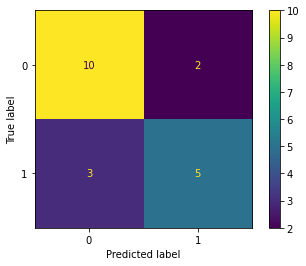

In [ ]:
cm = confusion_matrix(y_real, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# ANALYSIS- WHAT HAPPENED.

# What happened:
# Change 4 ad texts.

# In 2 cases we get a new classification error:

'''Matches For ad:  1720508
WRONG
Value:  1
Kompetence Lookup:Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende
Hvem er du…  Det er vigtigt, at du er kreativt stærk, kan tænke konceptuelt og er god til at opdage og udnytte nye, digitale platforme og værktøjer – og at du er en stærk holdspiller fra start til mål. - 0.46231025

THIS IS A NEW ERROR.

Matches For ad:  841530
WRONG
Value:  1
Kompetence Lookup:Er god til at tale med mennesker og sætte sig ind i deres behov
Gennem deres praktik udviklede de deres kompetencer og beviste deres dedikation - og gjorde sig selv uundværlige for teamet. - 0.40361828

THIS IS A NEW ERROR. '''

# In 1 case we get a classification error. 
# But for another reason.

'''Matches For ad:  1805634
WRONG
Value:  1
Kompetence Lookup:Du er god til at tænke ud af boksen, er ambitiøst og kreativt tænkende
Klik på knappen nedenfor og sæt dit CV online. - 0.45735312

THIS IS STILL AN ERROR'''

# In 1 case in again gets classified correctly,
# but because of another sentence in the AD.

'''Matches For ad:  1339731
Value:  1
Kompetence Lookup:Har gode kommunikationsevner
                                                                                                                                                                                                                                                Vil du også følge virksomheden? - 0.6444874
Still gets classified correctly.
But because of another sentence in the add'''

# Conclusion.
# FOR countvectorizer and TFIDF based similarity search in ad text, a change 
# in the ad text will create new search results.
# Here we changed 4 ad texts. Which resulted in changes in the search
# results for all of these ads. Which introduced 2 new errors, and
# changed the reason for the results in the tow other cases, even though 
# the result stayed the same. 


'Matches For ad:  1339731\nValue:  1\nKompetence Lookup:Har gode kommunikationsevner\n                                                                                                                                                                                                                                                Vil du også følge virksomheden? - 0.6444874\nStill gets classified correctly.\nBut because of another sentence in the add'